 Problem Definition:

Given an image, can we predict the correct class of this image?

The images are very small (32x32) and by visualizing them you will notice how difficult it is to distinguish them even for a human.

In this notebook we are going to build a CNN model that can classify images of various objects. We have 10 class of images:

    Airplane
    Automobile
    Bird
    Cat
    Deer
    Dog
    Frog
    Horse
    Ship
    Truck


make outpute for all layer have same ditrebuation(mean, learning rate, ) -->stable and easy to train so you can increase learning rate. not need droubout.

In [6]:
import pandas as pd  # to read dataset
import numpy as np    # to do operation like reshape
import matplotlib.pyplot as plt  # to do visalisation
%matplotlib inline  
import tensorflow as tf  
from tensorflow.keras.datasets import cifar10  # data set
from tensorflow.keras.utils import to_categorical  # to operate with classes
from tensorflow.keras.models import Sequential  # to creat model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

load data

In [7]:


(X_train, y_train), (X_test, y_test) = cifar10.load_data()



170498071/170498071 [==============================] - 6s 0us/step


visualisation

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


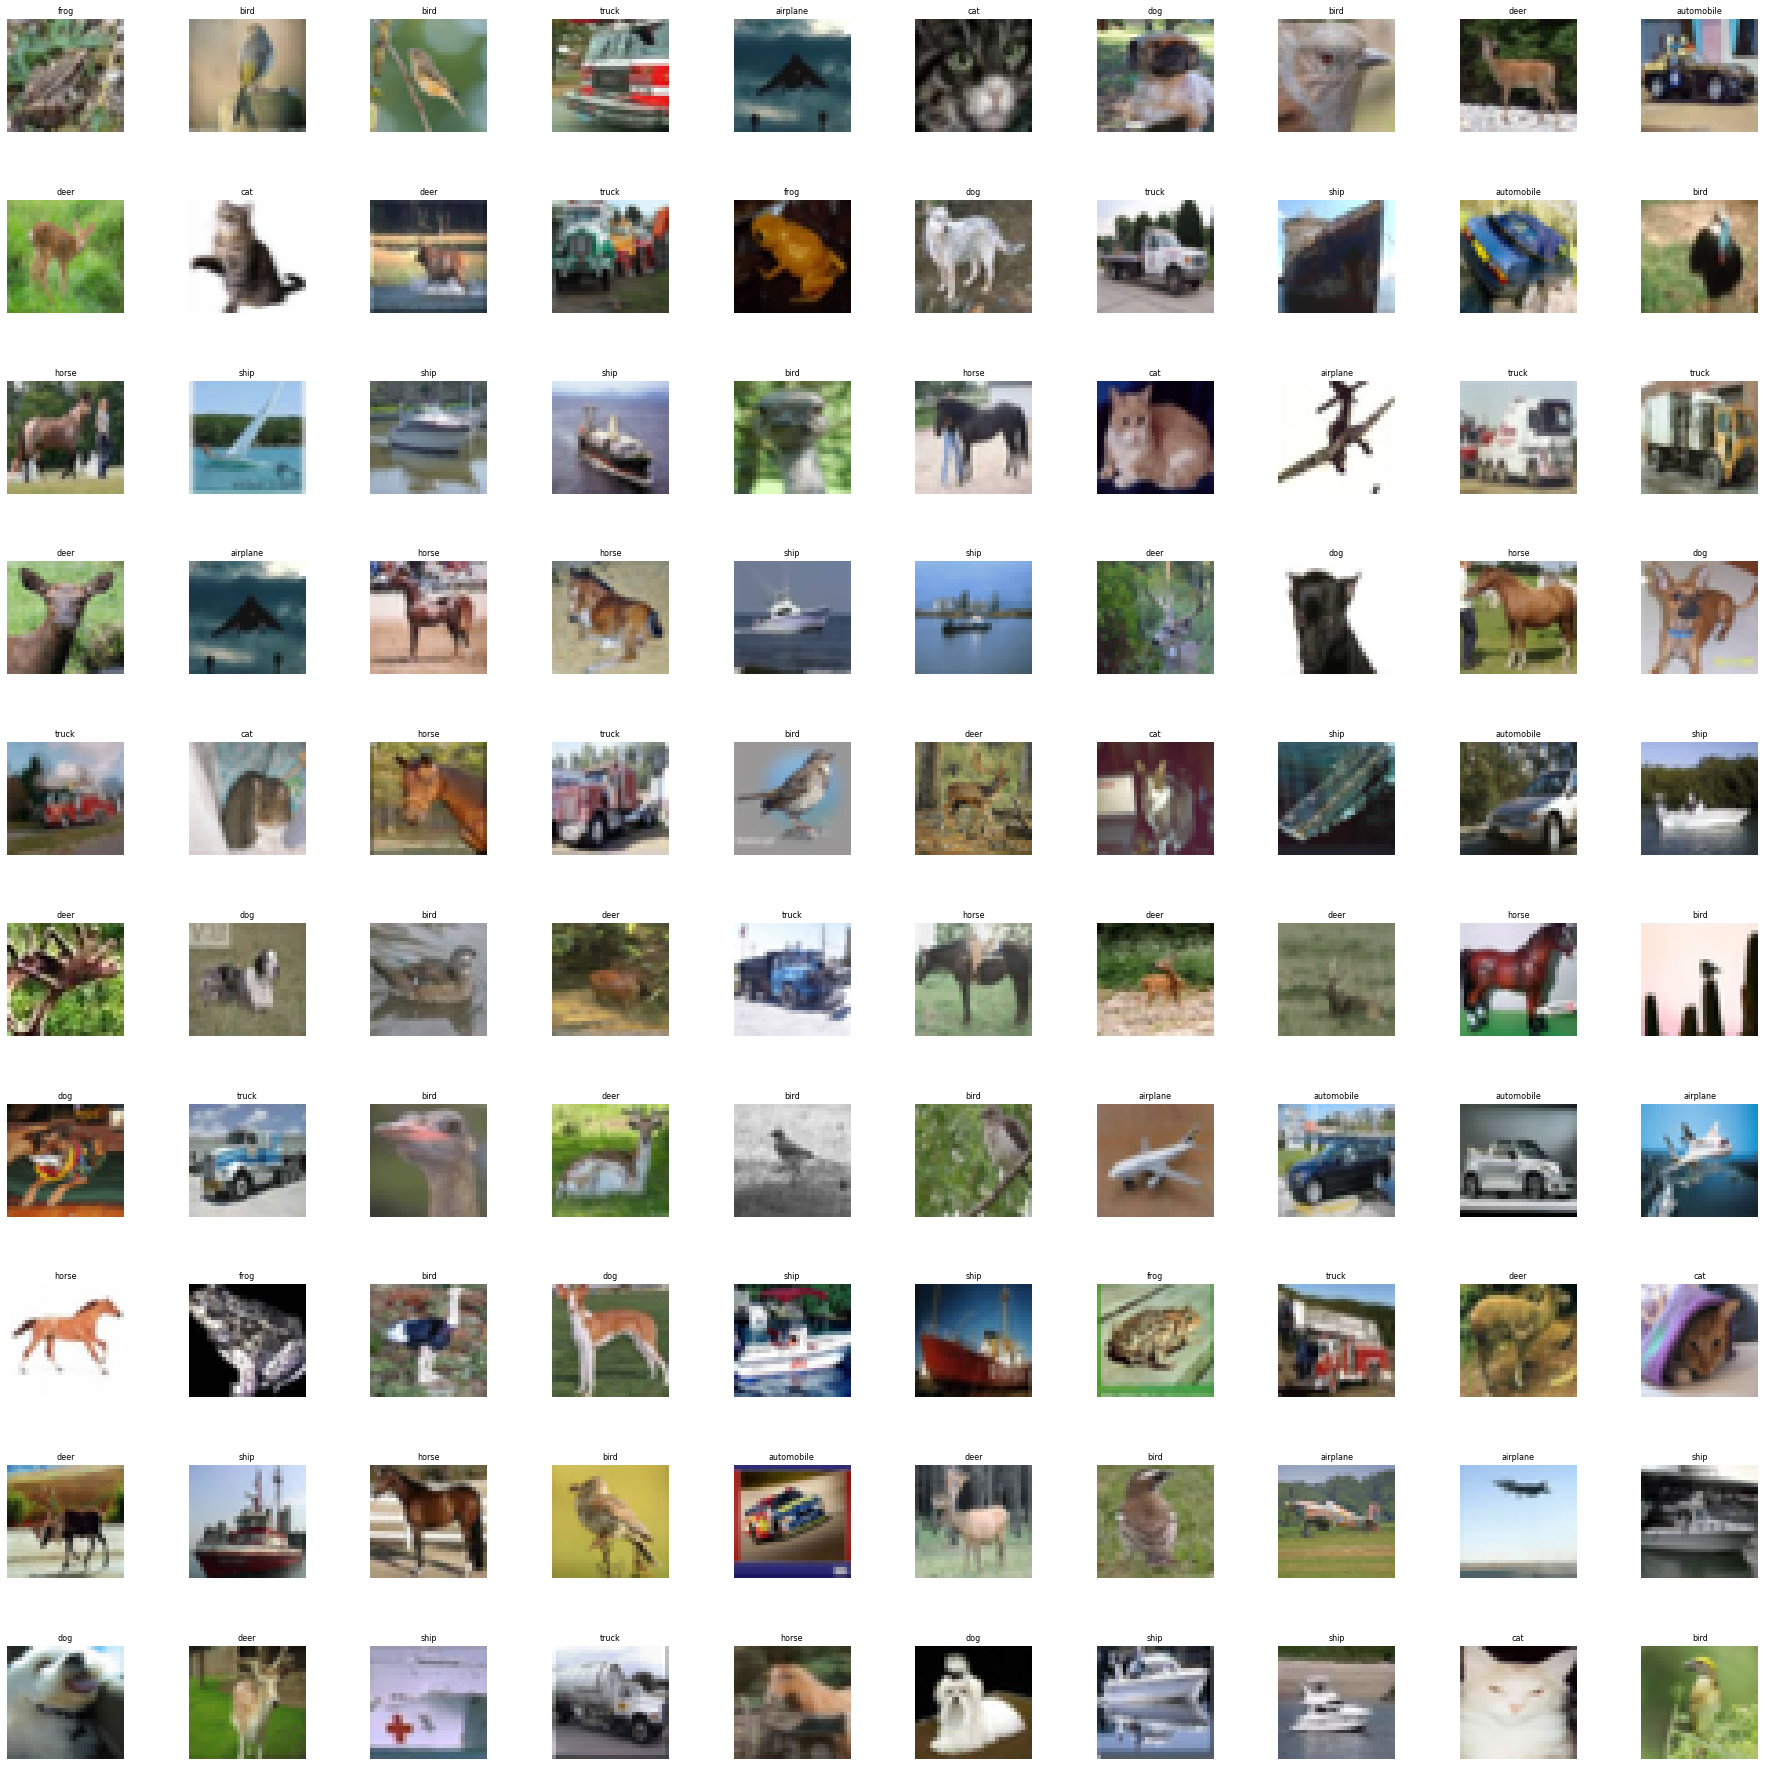

In [ ]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W = 10
L = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L, W, figsize = (32,32))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
# print(y_train[1])  # --> for testing
for i in np.arange(0, W * L): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)# to print name of label
    axes[i].axis('off')  # on print numbers at axis x,y

plt.subplots_adjust(hspace=.6)  # start print with space between images is == hspace

[5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


Text(0.5, 1.0, 'Class distribution in training set')

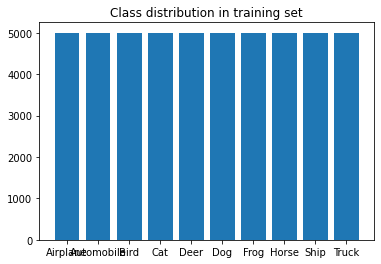

In [15]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
classes, counts = np.unique(y_train, return_counts=True)  # return sorted unique and (return_counts) default false here true to rreturn number of classes
print(counts)  # i found number of images equal
plt.bar(classes_name, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

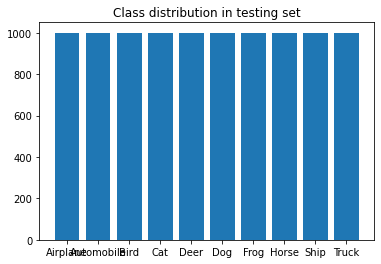

In [ ]:
lasses, counts = np.unique(y_test, return_counts=True)
plt.bar(classes_name, counts)
plt.title('Class distribution in testing set')

In [ ]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_multy_class_train = to_categorical(y_train, 10)
y_multy_class_test = to_categorical(y_test, 10)

In [ ]:
y_multy_class_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

model

In [ ]:
model = Sequential()  # to creat model

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())  
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())  # return vector
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
y_multy_class_test.shape

(10000, 10)

In [ ]:
# Run the model for a batch size of 50 for 100 epochs
model.fit(X_train, y_multy_class_train ,
                    validation_data = (X_test, y_multy_class_test),
                    batch_size = 50,  
                    epochs = 100,  
                    callbacks = [early_stop]
                   )

Epoch 1/100
1000/1000 [==============================] - 489s 488ms/step - loss: 0.3521 - accuracy: 0.8784 - precision: 0.9091 - recall: 0.8498 - val_loss: 0.5008 - val_accuracy: 0.8439 - val_precision: 0.8763 - val_recall: 0.8207
Epoch 2/100
1000/1000 [==============================] - 478s 478ms/step - loss: 0.3435 - accuracy: 0.8816 - precision: 0.9115 - recall: 0.8532 - val_loss: 0.6726 - val_accuracy: 0.7995 - val_precision: 0.8334 - val_recall: 0.7741
Epoch 3/100
1000/1000 [==============================] - 477s 477ms/step - loss: 0.3286 - accuracy: 0.8852 - precision: 0.9130 - recall: 0.8612 - val_loss: 0.5349 - val_accuracy: 0.8378 - val_precision: 0.8674 - val_recall: 0.8176


model evaluation

In [ ]:
# y_cat_train = to_categorical(y_train, 10)
# y_cat_test = to_categorical(y_test, 10)

In [ ]:
evaluation = model.evaluate(X_test, y_multy_class_test)



313/313 [==============================] - 25s 81ms/step - loss: 0.5349 - accuracy: 0.8378 - precision: 0.8674 - recall: 0.8176
Test Accuracy : {evaluation[1] * 100:.2f}%


In [ ]:
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

In [ ]:
evaluation

[0.5349284410476685,
 0.8378000259399414,
 0.8673880696296692,
 0.8176000118255615]

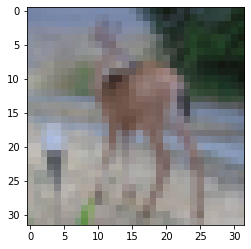

In [ ]:


my_image = X_test[100]
plt.imshow(my_image)



In [ ]:
# correctly predicted as a Deer
np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))

1/1 [==============================] - 0s 189ms/step


4

In [ ]:
# Saving our trained model
import os
# Saving our trained model
from tensorflow.keras.models import save_model
if os.path.isfile('best_model.h5') is False:
    model.save('MlFinalProject.h5')

In [1]:
# upload the model
from tensorflow.keras import models
model = models.load_model("/content/MlFinalProject.h5")


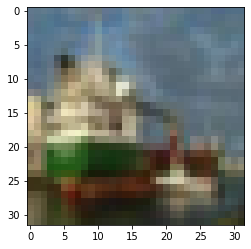

In [29]:
my_image = X_test[51]
plt.imshow(my_image)

In [30]:
np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))

1/1 [==============================] - 0s 41ms/step


8

In [16]:
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [31]:
model.predict(my_image.reshape(1, 32, 32, 3))

1/1 [==============================] - 0s 20ms/step


array([[6.067441e-29, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00]], dtype=float32)